# 4.5.2 Inferring a Binomial Proportion with PyMC3

In [1]:
!conda install -y -q pymc

Channels:
 - defaults
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /home/wspeirs/miniconda3

  added / updated specs:
    - pymc


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    arviz-0.17.1               |  py312h06a4308_0         3.3 MB
    cachetools-5.3.3           |  py312h06a4308_0          28 KB
    cloudpickle-3.0.0          |  py312h06a4308_0          40 KB
    cons-0.4.6                 |  py312h06a4308_0          18 KB
    etuples-0.3.9              |  py312h06a4308_0          25 KB
    filelock-3.13.1            |  py312h06a4308_0          24 KB
    h5netcdf-1.2.0             |  py312h06a4308_0         102 KB
    h5py-3.11.0                |  py312h34c39bb_0         1.4 MB
    hdf5-1.12.1                |       h2b7332f_3         5.4 MB
    logical-unification-0.4.6  |  py312h06a4308_0          28 KB
    markdown-it-

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pymc
import scipy.stats as stats

plt.style.use("ggplot")

Output()

Sequential sampling (1 chains in 1 job)
Metropolis: [theta]


Output()

Sampling 1 chain for 1_000 tune and 100_000 draw iterations (1_000 + 100_000 draws total) took 101 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


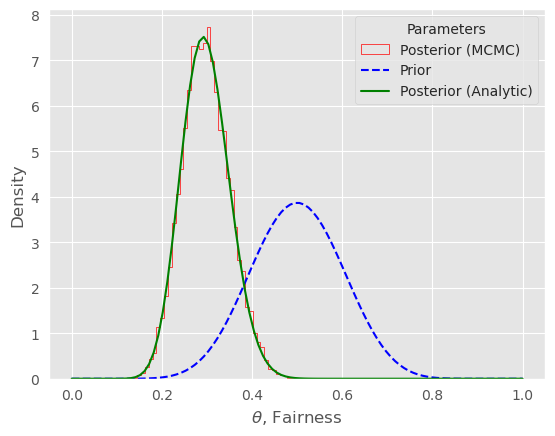

In [22]:
# Parameter values for prior and analytic posterior
n = 50
z = 10
alpha = 12
beta = 12
alpha_post = 22
beta_post = 52

# How many iterations of the Metropolis algorithm to carry out for MCMC
iterations = 100_000

# Use PyMC to construct a model context
with pymc.Model() as mcmc:
    # Define our prior belief about the fairness
    # of the coin using a Beta distribution
    theta = pymc.Beta("theta", alpha=alpha, beta=beta)
    
    # Define the Bernoulli likelihood function
    y = pymc.Binomial("y", n=n, p=theta, observed=z)
    
    # Carry out the MCMC analysis using the Metropolis algorithm
    # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
    start = pymc.find_MAP()
    
    # Use the Metropolis algorithm (as opposed to NUTS or HMC, etc.)
    step = pymc.Metropolis()
    
    # Calculate the trace
    trace = pymc.sample(draws=iterations, step=step, initvals=start, cores=2, chains=1, random_seed=1, progressbar=True, return_inferencedata=False)
    
    # Plot the posterior histogram from MCMC analysis
    bins=50
    plt.hist(trace.theta, bins, histtype="step", density=True, label="Posterior (MCMC)", color="red")
    
    # Plot the analytic prior and posterior beta distributions
    x = np.linspace(0, 1, 100)
    plt.plot(x, stats.beta.pdf(x, alpha, beta), "--", label="Prior", color="blue")
    
    plt.plot(x, stats.beta.pdf(x, alpha_post, beta_post), label='Posterior (Analytic)', color="green")
    
# Update the graph labels
plt.legend(title="Parameters", loc="best")
plt.xlabel("$\\theta$, Fairness")
plt.ylabel("Density")
plt.show()